<a href="https://colab.research.google.com/github/ColeHenson/Data-Science24-25/blob/main/Another_copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Sometimes the relationship in the data is more complicated than a simple linear regression and polynomial elements help to capture some of that complexity.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

First of all, the relationships being captured are not always complicated. For example if there is a stricly linear relationship in the data a linear regression would be a better model. Furthermore, polynomial elements tend to overfit the data and it is not neccesarily beneficial to make more complex models.

**Task3**:

What's the point of using b splines?

B splines are a method of capturing complexity in the model without doing the same overfitting to the data.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A gaussian process is a method applying a knot (a median value for b splines) at every possible data point (infinite data).

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install preliz
!pip install bambi


import preliz as pz
import bambi as bmb
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt


  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-lq89etmk
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-lq89etmk
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=9926431b2239d4d1c169f591669096a9335e9e4329dfa3f5d11488528ef01e8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-el77afjc/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
   ━

In [3]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [6]:
model_poly_3 = bmb.Model("weight ~ poly(height, degree=3)", howell, family="negativebinomial")
idata_poly_3 = model_poly_3.fit()

Output()

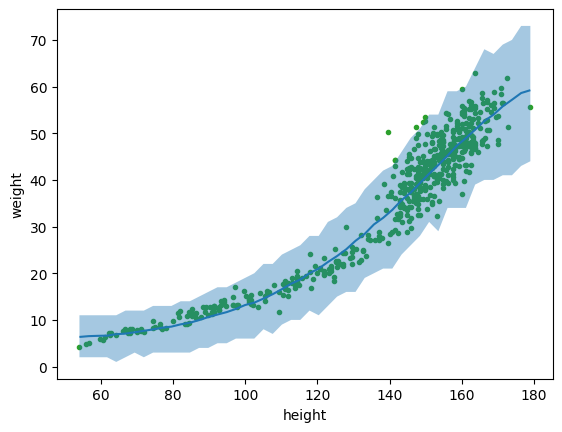

In [8]:
bmb.interpret.plot_predictions(model_poly_3, idata_poly_3, "height", pps=True)
#raw data
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

When there are categorical changes in the data, those changes can be modeled with piecewise functions where the endpoints of each piece is a changepoint.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

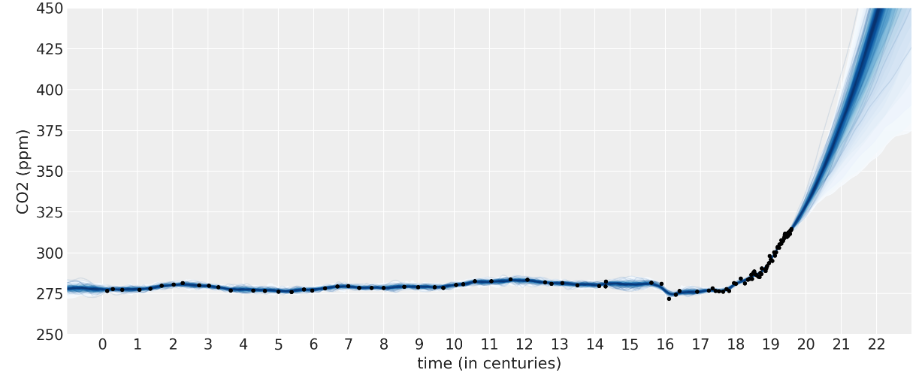


This is my favorite graph because I like the color choice. I also think it does a good job showing how a lack of data (such as at 15 centuries) results in greater variance in predicted C02 values. I also think the graph does a good job of showing how changes in the world (in this case global warming in the 18th century onwards) necessitates a change in the way the data is modeled or a spline.